In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
cols = ["flength","fwidth","fsize","fConc","fConc1", "fAsym" , "fM3Long","fM3Trans", "fAlpha" , "fDist" , "class"]
df = pd.read_csv("magic04.data",names=cols)
df

,flength,fwidth,fsize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [10]:
df["class"] = (df["class"]=='g').astype(int)
df

,flength,fwidth,fsize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


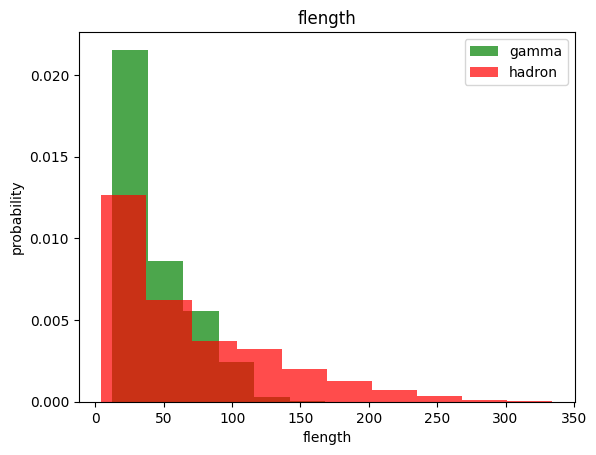

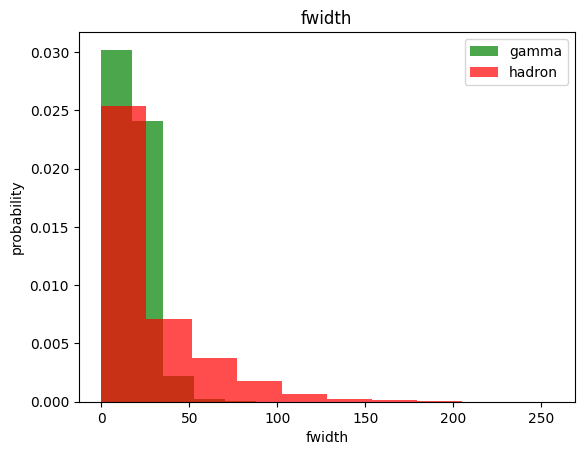

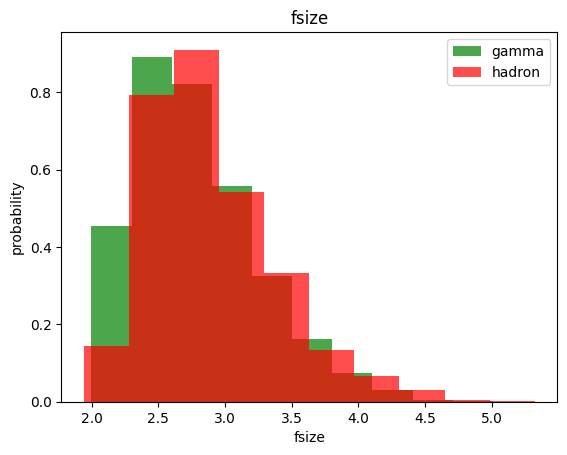

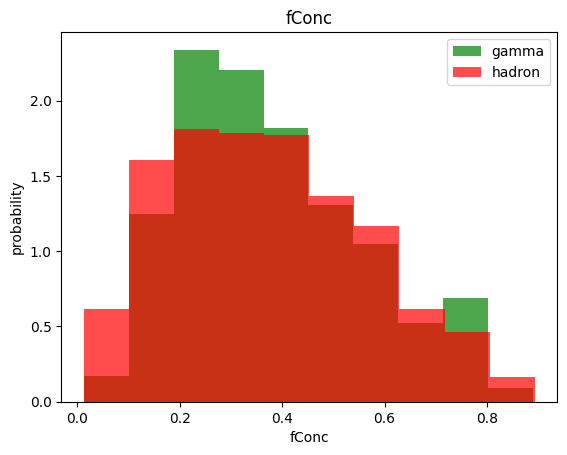

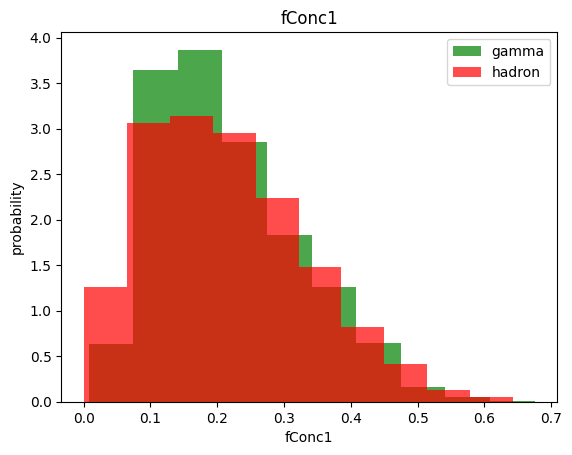

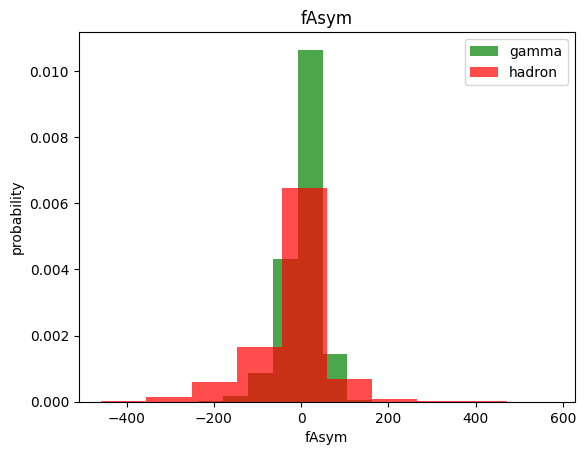

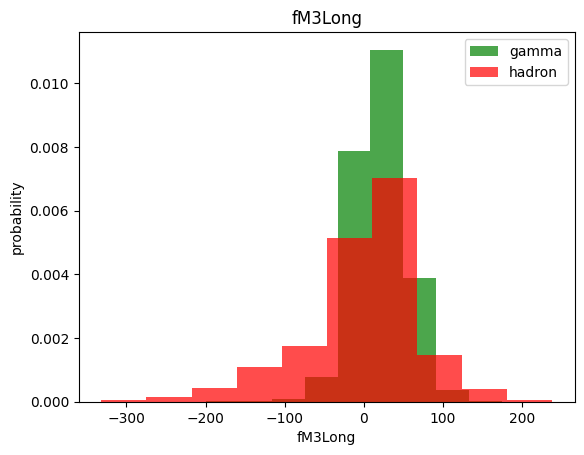

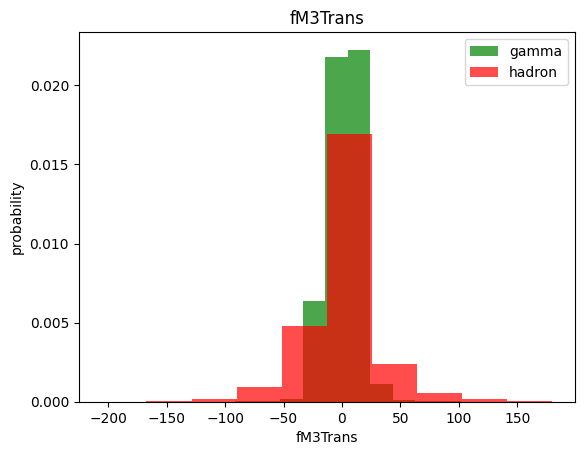

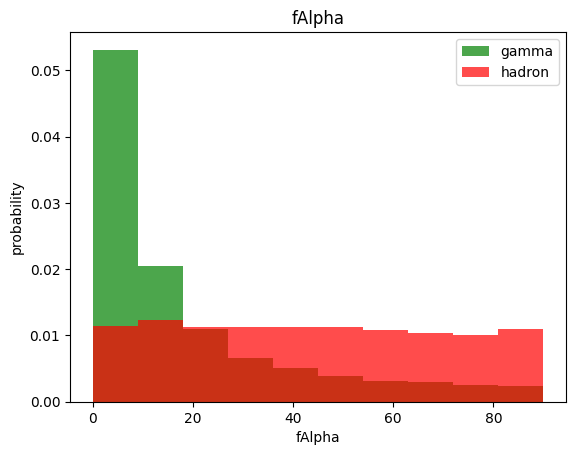

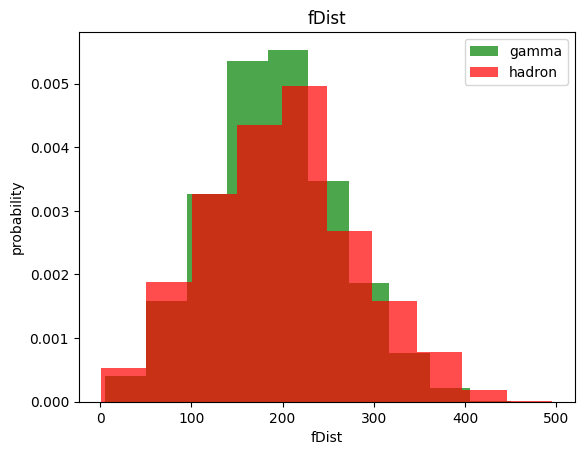

In [11]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label] , color='green',label='gamma',alpha=0.7 , density=True)
    plt.hist(df[df["class"]==0][label] , color ='red' , label='hadron' , alpha=0.7 , density=True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
train , valid , test = np.split(df.sample(frac=1),[int(0.6 * len(df)) , int(0.8 * len(df))])

C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
def scale_dataset_sample(dataframe):
    x = dataframe[dataframe.cols[:-1]].values
    y = dataframe[dataframe.cols[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    data = np.hstack((x , np.reshape(y,(-1 , -1))))
    return data , x , y

In [14]:
## print gamma training set 
print (len(train[train["class"]==1]))

7419


In [15]:
### print hadrons training set count
print(len(train[train["class"]==0]))

3993


In [16]:
## since gamma are in 7000's and hadron's are in 4000's , we should use random over sampler

from imblearn.over_sampling import RandomOverSampler

def scale_dataset(dataframe , oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample :
        ros = RandomOverSampler()
        x,y = ros.fit_resample(x,y)
   
    data = np.hstack((x , y.reshape(-1,1)))
   
    
    return data , x , y

In [17]:
train , x_train , y_train = scale_dataset( train , oversample = True)

In [18]:
len(y_train)

14838

In [19]:
sum(y_train==1)

np.int64(7419)

In [20]:
sum(y_train==0)

np.int64(7419)

In [21]:
valid , x_valid , y_vaid = scale_dataset(valid , oversample=False)
test , x_test , y_test = scale_dataset(test , oversample=False)

In [ ]:
### Neural Network Implementation

In [22]:
import tensorflow as tf

In [23]:
def plot_loss (history) :
    plt.plot(history.history['loss'] , label='loss')
    plt.plot(history.history['val_loss'] , label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Cross Entropy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [24]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'] , label='accuracy')
    plt.plot(history.history['val_accuracy'] , label='val-accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [25]:
## creating our Neural Network model

NN_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32 , activation='relu' , input_shape=(10,)),
    tf.keras.layers.Dense(32 , activation='relu') ,
    tf.keras.layers.Dense(1 , activation='sigmoid' )
])

NN_model.compile(optimizer = tf.keras.optimizers.Adam(0.001) , loss='binary_crossentropy' , metrics=['accuracy'])


C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
history = NN_model.fit(x_train , y_train , epochs=100 , batch_size=32 , validation_split=0.2)

Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7115 - loss: 0.5502 - val_accuracy: 0.7254 - val_loss: 0.5292
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8308 - loss: 0.3899 - val_accuracy: 0.7318 - val_loss: 0.5260
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8475 - loss: 0.3549 - val_accuracy: 0.7503 - val_loss: 0.4840
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8552 - loss: 0.3524 - val_accuracy: 0.7537 - val_loss: 0.4837
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8583 - loss: 0.3422 - val_accuracy: 0.7544 - val_loss: 0.4693
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8567 - loss: 0.3319 - val_accuracy: 0.7251 - val_loss: 0.5560
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8622 - loss: 0.3334 - val_accuracy: 0.7325 - val_loss: 0.5319
Epoch 8/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8611 - loss: 0.3330 - val_accu

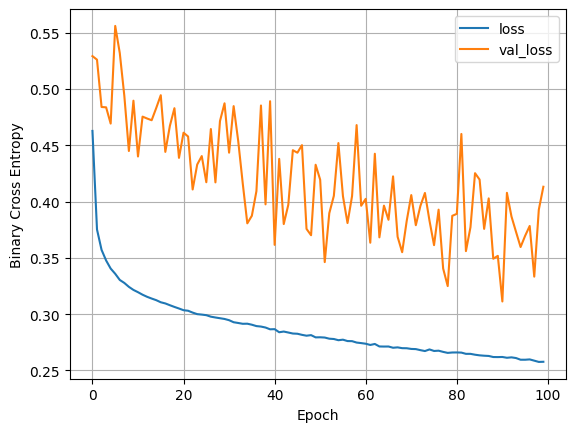

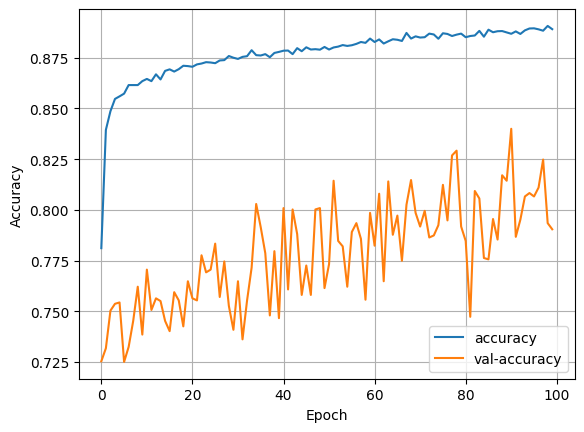

In [27]:
plot_loss(history)
plot_accuracy(history)

In [29]:
 ### Lets optimize the code

def plot_history(history):
    fig , (ax1 , ax2) = plt.subplots(1,2,Figsize=(10,4))
    ax1.plot(history.history['loss'] , label='loss')
    ax1.plot(history.history['val_loss'] , label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Cross Entropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'] , label='Accuracy')
    ax2.plot(history.history['val_accuracy'] , label='val_accuray')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

In [36]:
## Lets create our NN model by defining a function and pass all values as parameters

def train_model( x_train , y_train , num_nodes , dropout_prob , learning_rate , batch_size , epochs):
    NN_moddel = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes , activation='relu' , input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes , activation='relu') ,
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    NN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate) , loss='binary_crossentropy' , metrics=['accuracy'])
    history = NN_model.fit(x_train , y_train , epochs=epochs , batch_size=batch_size , validation_split=0.2 )

    return NN_model , history

In [37]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16 , 32 , 64]:
    for dropout_prob in [0 , 0.2]:
        for learning_rate in [0.01 , 0.005 , 0.001]:
            for batch_size in [32 , 64 , 128] :
                print(f"{num_nodes} nodes , {dropout_prob} dropout_prob , {learning_rate} learning_rate , {batch_size} batch_size ")
                model , history = train_model (x_train , y_train , num_nodes , dropout_prob , learning_rate , batch_size , epochs)

                plot_history(history)
                val_loss = model.evaluate(x_valid , y_valid)
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model


16 nodes , 0 dropout_prob , 0.01 learning_rate , 32 batch_size 
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8645 - loss: 0.3308 - val_accuracy: 0.7483 - val_loss: 0.4760
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8637 - loss: 0.3185 - val_accuracy: 0.7551 - val_loss: 0.4491
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8704 - loss: 0.3029 - val_accuracy: 0.7577 - val_loss: 0.4530
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8615 - loss: 0.3177 - val_accuracy: 0.7433 - val_loss: 0.4924
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8730 - loss: 0.2956 - val_accuracy: 0.6998 - val_loss: 0.5879
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8739 - loss: 0.3009 - val_accuracy: 0.7800 - val_loss: 0.3832
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8694 - loss: 0.3102 - val_accuracy: 0.7500 - val_loss: 0.4391
Epoch 8/100
371/371 ━━━━━━━━━━━━━

AttributeError: Figure.set() got an unexpected keyword argument 'Figsize'